In [6]:
import torch
import random
from d2l import torch as d2l
import random  #随机梯度下降  随机init weight

偏差加入权重  [x,1][w,b]T 

n维输入的加权和   外加偏差
平方损失 
线性回归有显示解

挑选w0  wt=w（t-1）-n(grad)

b随机采样  b个值 来计算梯度 来作为grad
batch size 

samm 
梯度下降不断向反梯度方向更新参数
小批量随机梯度下降默认
batch size  learning rate

In [9]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y +=torch.normal(0,0.1,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2

features,labels = synthetic_data(true_w,true_b,1000)


In [10]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([0.8207, 0.5843]) 
label: tensor([3.9239])


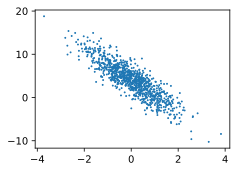

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1);     #pytorch的一些版本需要detach出来才能转到numpy

data_iter

In [12]:
def data_iter(batch_size,feathers,labels):
    num_example = len(feathers)
    indices = list(range(num_example))  #rang 0-n-1 change to py list
    random.shuffle(indices)
    for i in range(0,num_example,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_example)])
        yield feathers[batch_indices], labels[batch_indices]

batch_size = 10

for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    

tensor([[ 0.3624, -0.7367],
        [ 0.7820, -1.6526],
        [ 0.2698,  1.1267],
        [-1.7882, -1.2815],
        [-0.1994, -0.3979],
        [-0.7897,  0.9438],
        [-0.3509, -2.0693],
        [ 1.0748, -1.1808],
        [-0.2295,  0.9659],
        [-0.3204, -0.7417]]) 
 tensor([[ 7.5345],
        [11.3076],
        [ 0.7613],
        [ 4.9482],
        [ 5.4132],
        [-0.5445],
        [10.6411],
        [10.3708],
        [ 0.1982],
        [ 6.0217]])
tensor([[ 1.1029,  0.5266],
        [-0.1733,  0.6286],
        [-0.5258, -1.6160],
        [ 0.4310,  0.6481],
        [-0.6447, -1.0492],
        [ 1.3319,  1.1940],
        [ 1.0119, -0.4199],
        [ 0.9503,  1.6544],
        [ 0.6263,  0.1756],
        [ 0.5233,  0.7897]]) 
 tensor([[4.5308],
        [1.7995],
        [8.5378],
        [2.6913],
        [6.4619],
        [2.8632],
        [7.5740],
        [0.3803],
        [4.8594],
        [2.6282]])
tensor([[-0.5801,  0.0233],
        [-0.7636, -2.7199],
      

In [14]:
w =torch.normal(0,1,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [15]:
def linreg (x,w,b):
    return torch.matmul(x,w) + b #chen

In [16]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

优化函数

In [24]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/ batch_size #上面的loss没有均值  二选一
            param.grad.zero_()

In [27]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w, b],lr,batch_size) #不严谨
    with torch.no_grad():
        train_1 = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_1.mean()):f}')
        

epoch1,loss0.005064
epoch2,loss0.005078
epoch3,loss0.005074
